In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

%matplotlib inline
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

import itertools
import cPickle

In [2]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': '#EAEAF2',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 0.0,
 'figure.facecolor': (1, 1, 1, 0),
 'font.family': [u'sans-serif'],
 'font.sans-serif': [u'Arial',
  u'Liberation Sans',
  u'Bitstream Vera Sans',
  u'sans-serif'],
 'grid.color': 'white',
 'grid.linestyle': u'-',
 'image.cmap': u'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': u'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': u'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': u'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

In [3]:
sns.set(font_scale=1)

In [4]:
cd CollegeScorecard_Raw_Data/

/home/vagrant/datacourse/Capstone/CollegeScorecard_Raw_Data


In [15]:
collegeCost = cPickle.load(open('collegeCost.pkl', 'rb'))

## Admission rate...

In [16]:
adminRateDF = cPickle.load(open('adminRateDF.pkl', 'rb'))

In [17]:
adminRateDF.head()

,College,AdmissionRate
0,Stanford University,5.69
1,Harvard University,5.84
2,Yale University,7.05
3,Princeton University,7.41
4,Columbia University in the City of New York,7.42


In [18]:
myDF = adminRateDF.sort(columns='AdmissionRate', ascending = True).reset_index()
del myDF["index"]
myDF

,College,AdmissionRate
0,Stanford University,5.69
1,Harvard University,5.84
2,Yale University,7.05
3,Princeton University,7.41
4,Columbia University in the City of New York,7.42
5,Cooper Union for the Advancement of Science an...,7.74
6,Massachusetts Institute of Technology,8.15
7,University of Chicago,8.81
8,Brown University,9.18
9,Dartmouth College,9.78


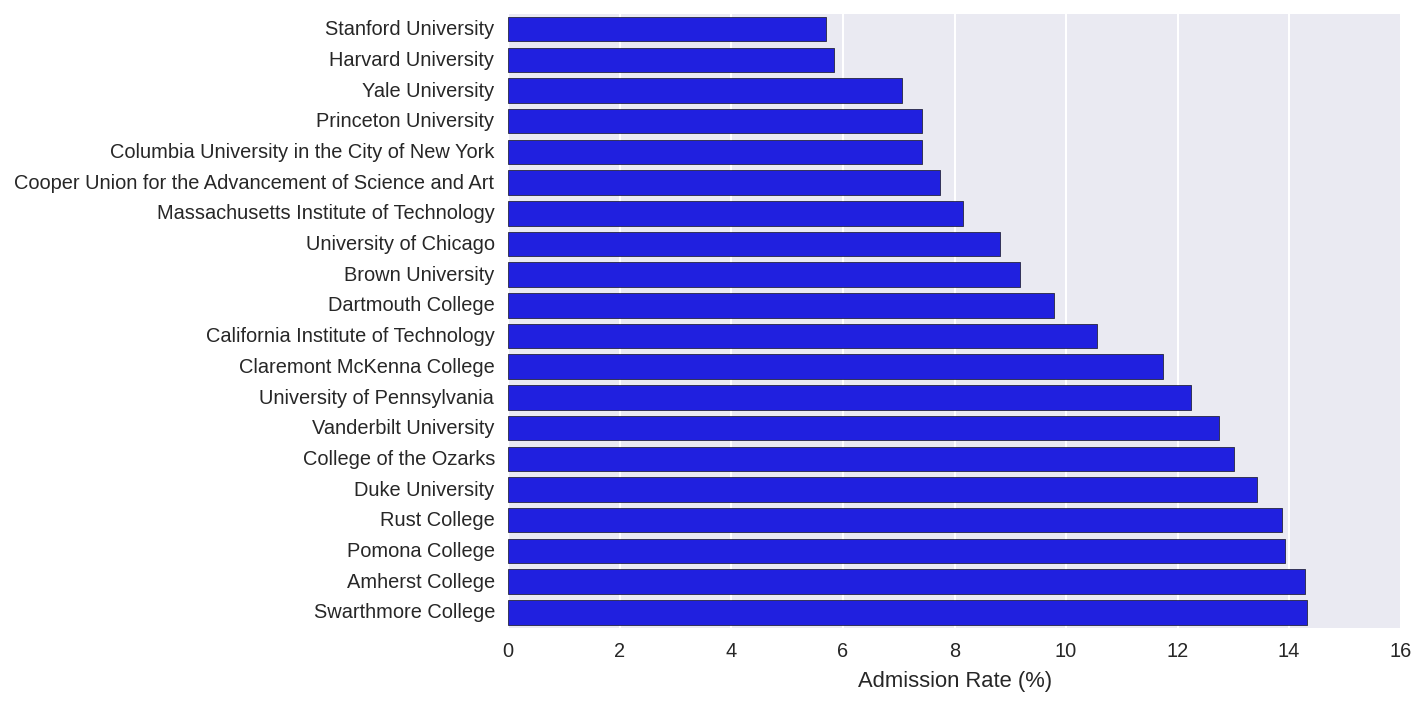

In [19]:
sns.set(font_scale=1)
sns.barplot(x='AdmissionRate', y='College', data=myDF, color='b')
plt.xlabel('Admission Rate (%)')
plt.ylabel('')
plt.savefig('AdmissionRate.png', bbox_inches = 'tight')

## Number of schools over the years...

In [20]:
noOfSchools = cPickle.load(open('noOfSchools.pkl', 'rb'))

In [21]:
myDF = noOfSchools
myDF.head()

,Year,NumSchools
0,1996,6794
1,1997,6699
2,1998,6480
3,1999,6466
4,2000,6478


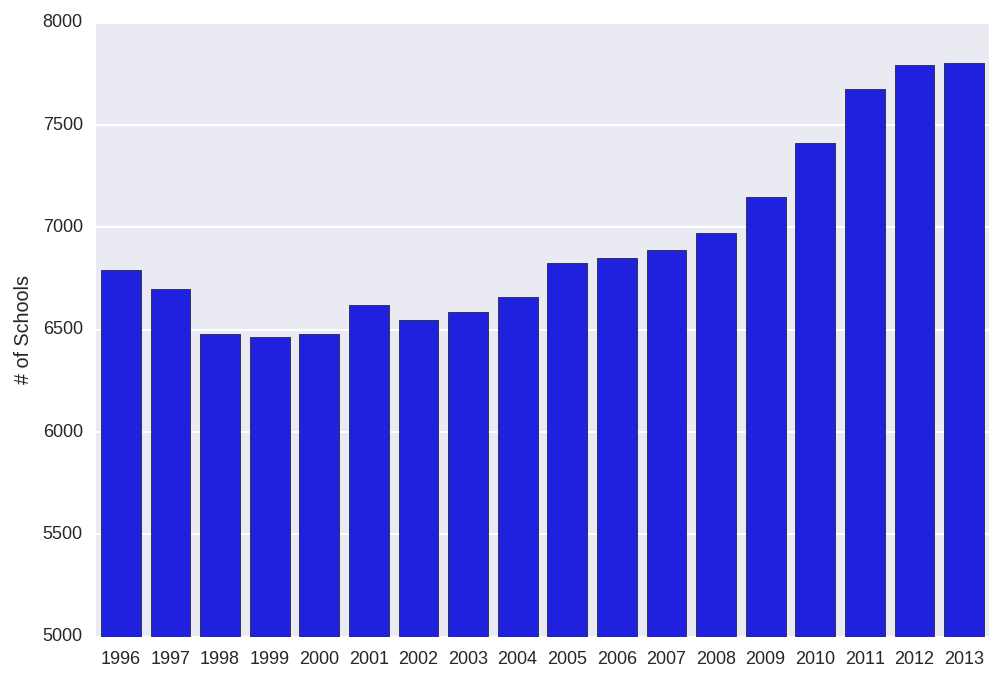

In [22]:
sns.set(font_scale=0.9)
sns.barplot(x='Year', y='NumSchools', data=myDF, color='b')
plt.ylim([5000, 8000])
plt.xlabel('')
plt.ylabel('# of Schools')
plt.savefig('NoOfSchool.png', bbox_inches = 'tight')
sns.set(font_scale=1)

## School enrollment...

In [25]:
enrollment = cPickle.load(open('enrollment.pkl', 'rb'))

In [26]:
myDF = enrollment.head(20)
myDF.head()

,College,UndergradEnrollment,CollegeType
0,University of Phoenix-Online Campus,166816,Private for-profit
1,University of Central Florida,50919,Public
2,Ashford University,50403,Private for-profit
3,Liberty University,47079,Private nonprofit
4,Texas A & M University-College Station,43931,Public


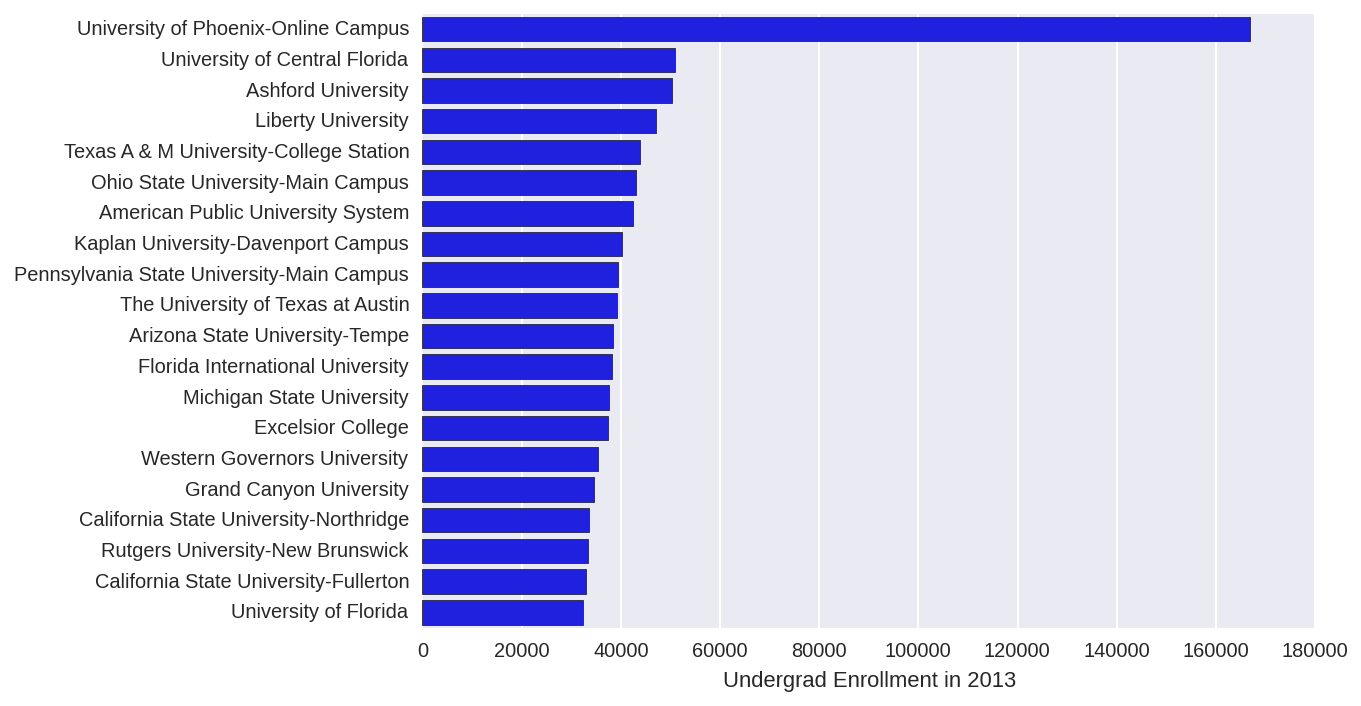

In [27]:
sns.barplot(x='UndergradEnrollment', y='College', data=myDF, color='b')
plt.xlabel('Undergrad Enrollment in 2013')
plt.ylabel('')
#plt.savefig("Top20UGEnrollment.png", bbox_inches = 'tight')
sns.set(font_scale=1)

## College cost...

In [28]:
collegeCost = cPickle.load(open('collegeCost.pkl', 'rb'))

In [29]:
myDF = collegeCost.head(20)
myDF.head()

,College,Cost,CollegeType
0,Sarah Lawrence College,62636,Private nonprofit
1,Washington University in St Louis,62594,Private nonprofit
2,University of Chicago,62425,Private nonprofit
3,Columbia University in the City of New York,61540,Private nonprofit
4,Dartmouth College,61398,Private nonprofit


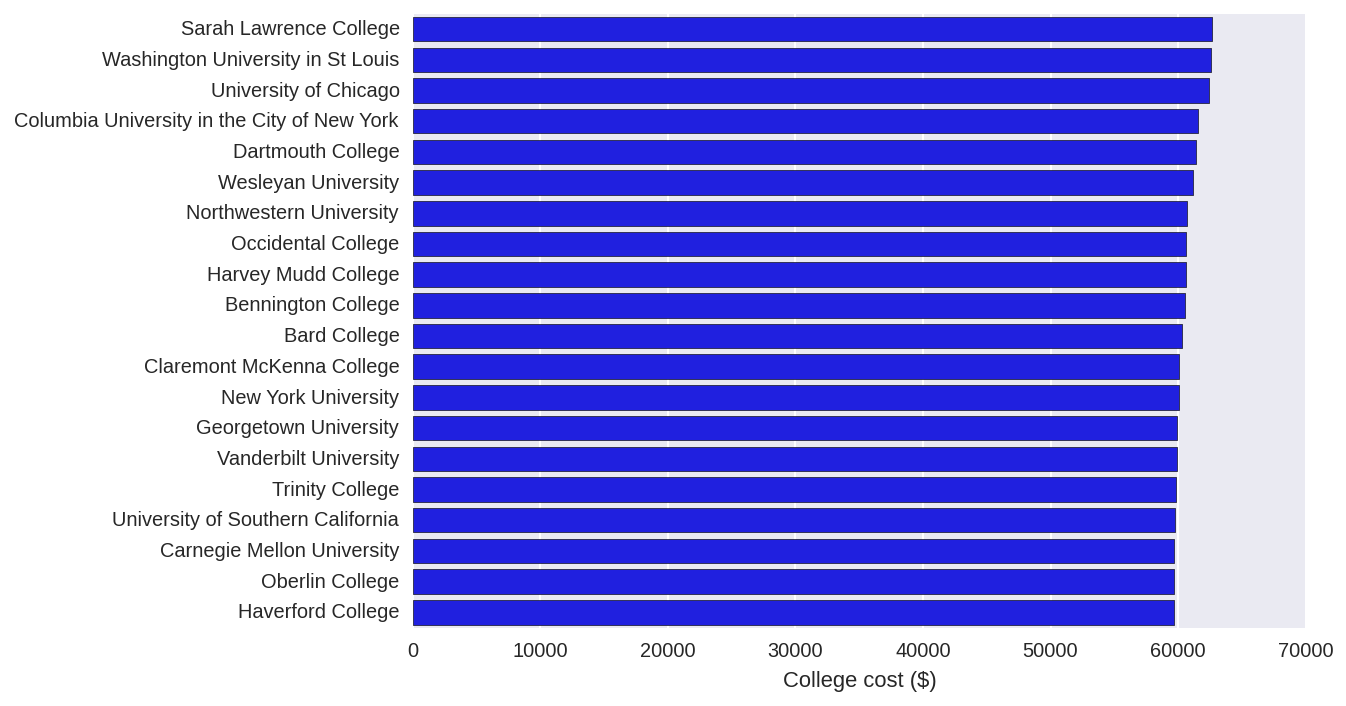

In [30]:
sns.barplot(x='Cost', y='College', data=myDF, color='b')
plt.xlabel('College cost ($)')
plt.ylabel('')
#plt.savefig("Top20UGEnrollment.png", bbox_inches = 'tight')
sns.set(font_scale=1)

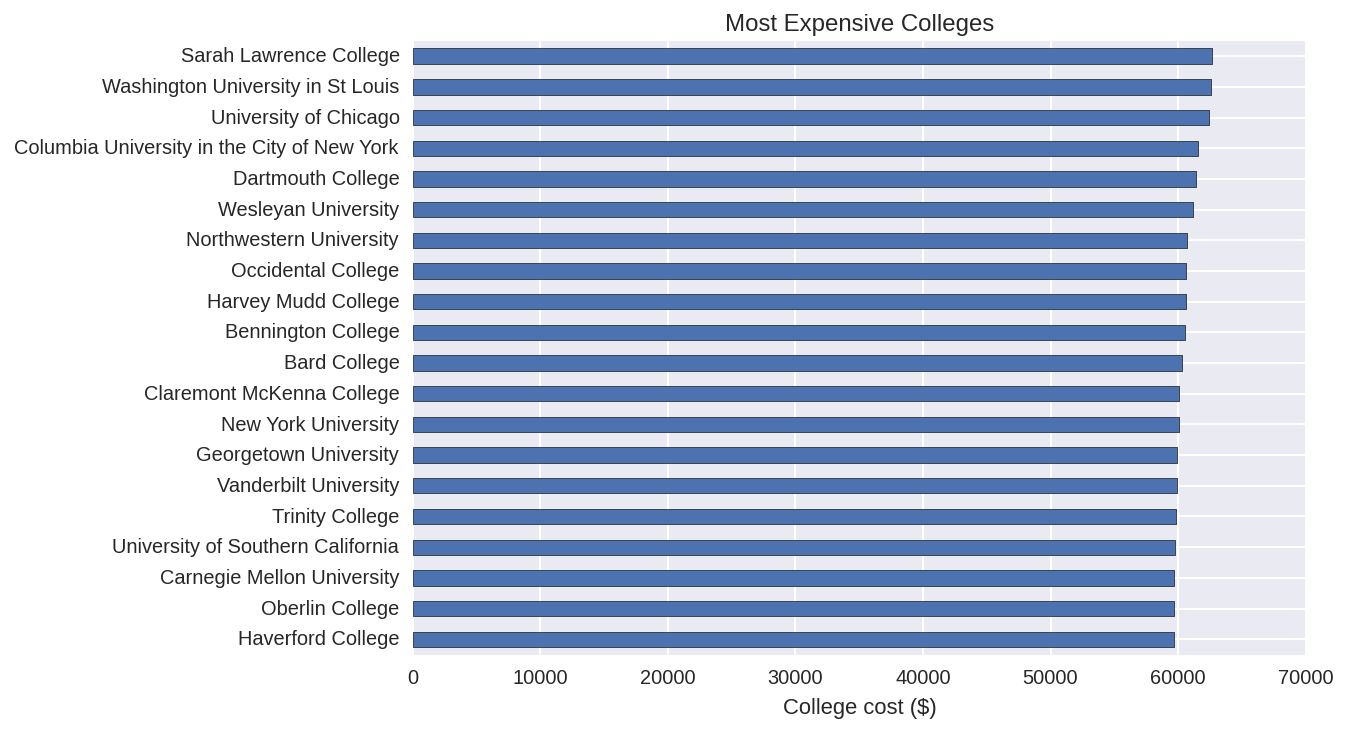

In [31]:
sns.set()


collegeCostTop20 = collegeCost.head(20)
myDF = collegeCostTop20.sort(columns='Cost', ascending = True).reset_index()
myDF['Cost'].plot(kind = 'barh', legend = False)
univs = myDF.College
plt.yticks(myDF.index, univs)
plt.xlim([0, 70000])
plt.xlabel('College cost ($)')
plt.title('Most Expensive Colleges')
plt.figaspect(2.0)
plt.savefig("MostExpensiveColleges.png", bbox_inches = 'tight')

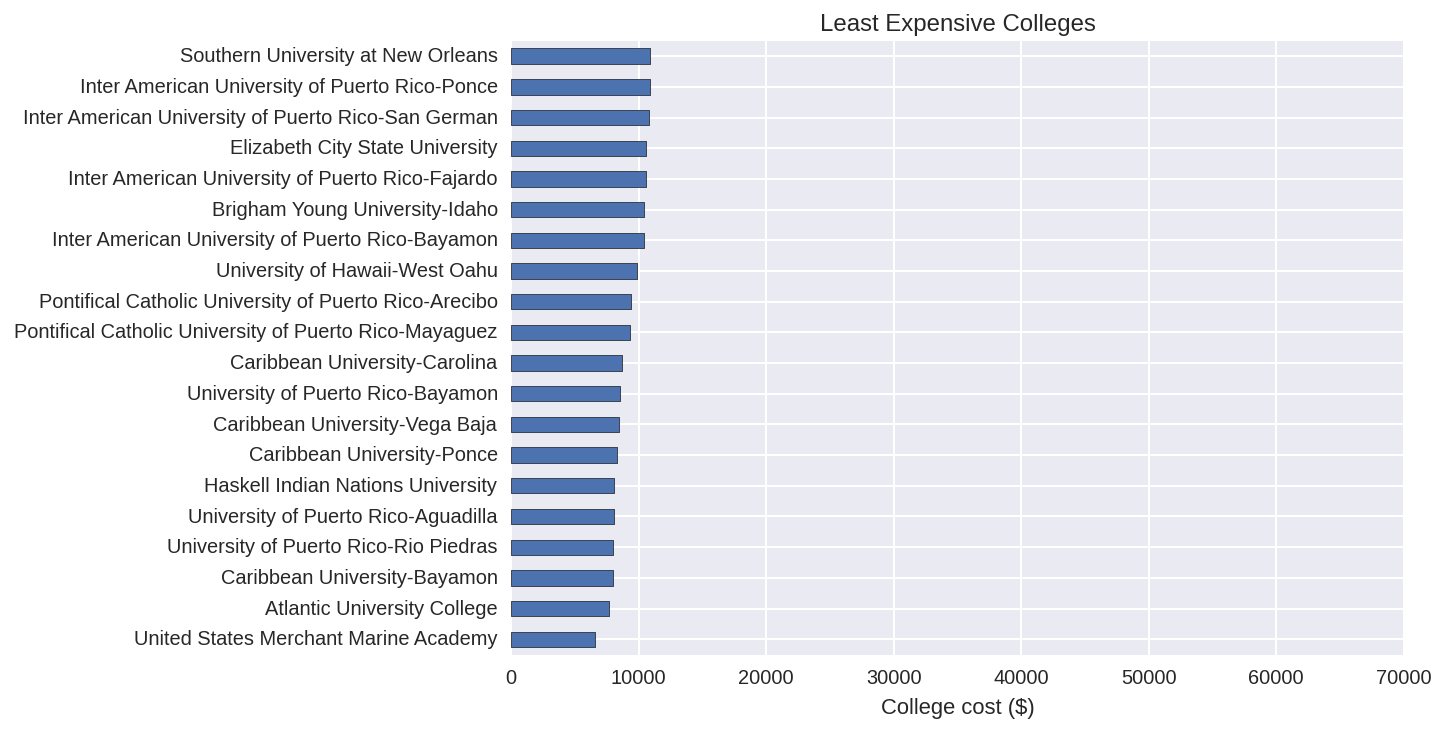

In [32]:
sns.set()


collegeCostLast20 = collegeCost.tail(20)
myDF = collegeCostLast20.sort(columns='Cost', ascending = True).reset_index()
myDF['Cost'].plot(kind = 'barh', legend = False)
univs = myDF.College
plt.yticks(myDF.index, univs)
plt.xlim([0, 70000])
plt.xlabel('College cost ($)')
plt.title('Least Expensive Colleges')
plt.figaspect(2.2)
plt.savefig("LeastExpensiveColleges.png", bbox_inches = 'tight')

In [33]:
frames = [collegeCostTop20, collegeCostLast20]
sumTotal = pd.concat(frames)

In [34]:
sumTotal.columns

Index([u'College', u'Cost', u'CollegeType'], dtype='object')

In [35]:
cPforProfit = collegeCost[collegeCost['CollegeType'] == "Private for-profit"]
cPforProfit.rename(columns={'Cost': 'Private for profit'}, inplace=True)
cPforNonProfit = collegeCost[collegeCost['CollegeType'] == "Private nonprofit"]
cPforNonProfit.rename(columns={'Cost': 'Private for non-profit'}, inplace=True)
cPublic = collegeCost[collegeCost['CollegeType'] == "Public"]
cPublic.rename(columns={'Cost': 'Public'}, inplace=True)

/opt/conda/lib/python2.7/site-packages/pandas/core/frame.py:2524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


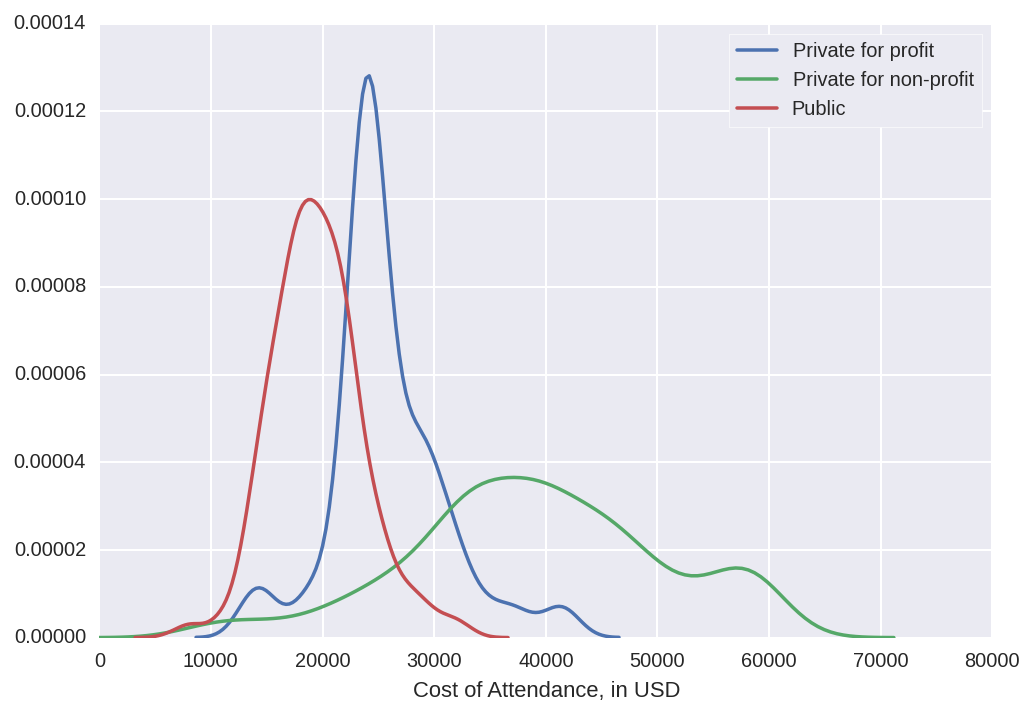

In [40]:
sns.set()
fig = sns.kdeplot(cPforProfit['Private for profit'], legend = True)
fig = sns.kdeplot(cPforNonProfit['Private for non-profit'], legend = True)
fig = sns.kdeplot(cPublic['Public'], legend = True)
plt.xlabel('Cost of Attendance, in USD')
plt.legend(frameon = True)
plt.xlim([0, 80000])
plt.savefig("CostOfAttendance.png", bbox_inches = 'tight')

## Median earnings once they graduate...

In [37]:
earnings = cPickle.load(open('earnings.pkl', 'rb'))

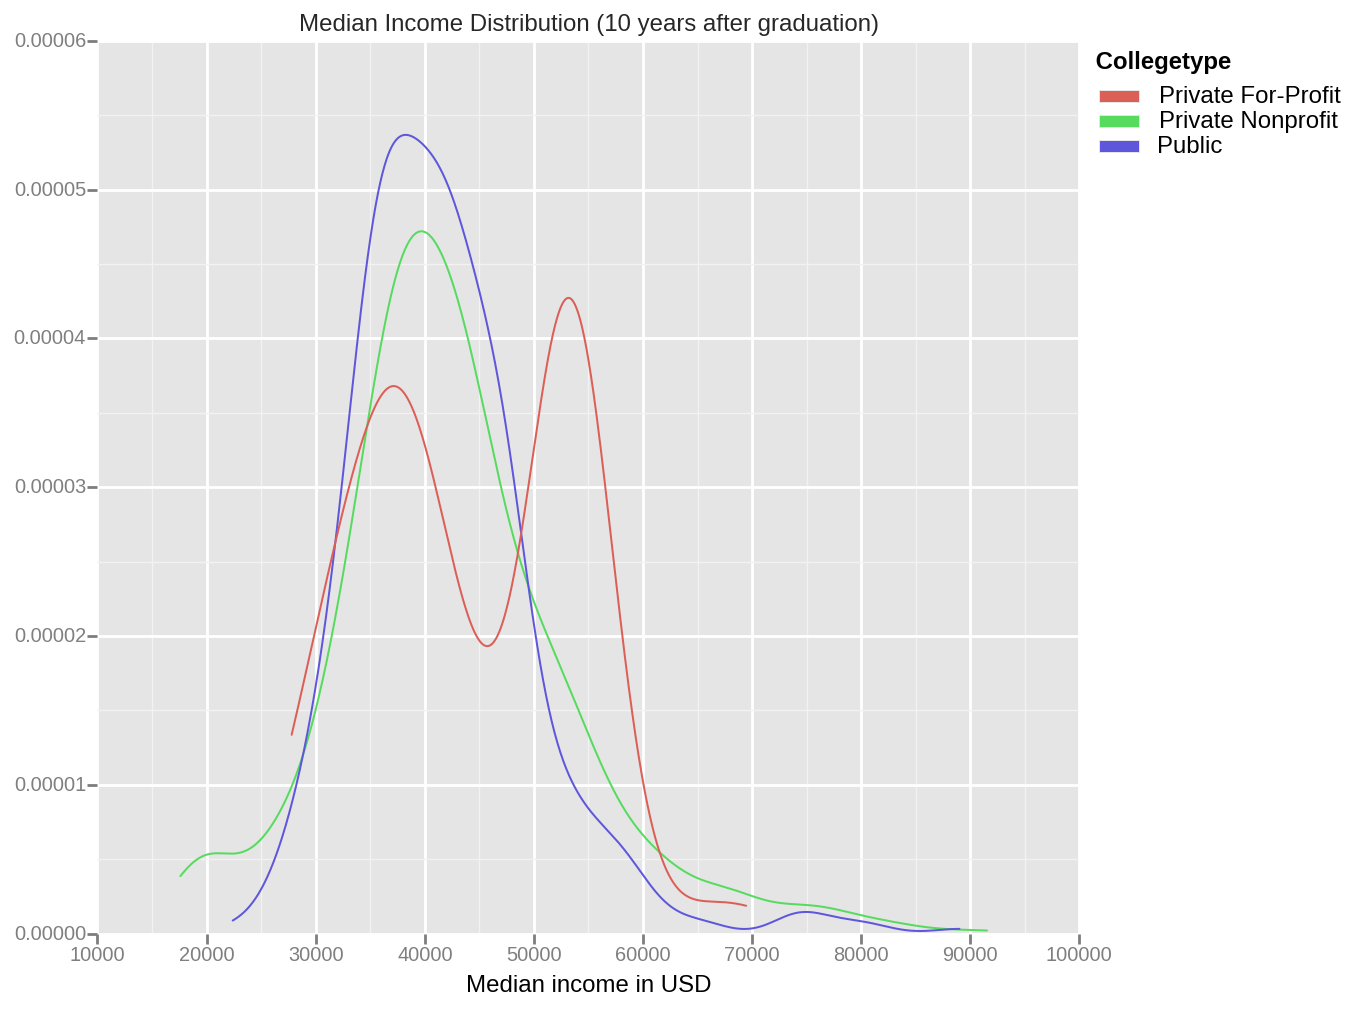

In [38]:
from ggplot import *
import matplotlib.pyplot as plt

from bokeh import mpl
from bokeh.plotting import output_notebook, show

g = ggplot(earnings, aes(x='e50', color='CollegeType')) + geom_density()
g.draw()
plt.title("Median Income Distribution (10 years after graduation)")
plt.xlabel("Median income in USD")
show(g)

In [41]:
PforProfit = earnings[earnings['CollegeType'] == "Private for-profit"]
PforProfit.rename(columns={'e50': 'Private for profit'}, inplace=True)
PforNonProfit = earnings[earnings['CollegeType'] == "Private nonprofit"]
PforNonProfit.rename(columns={'e50': 'Private for non-profit'}, inplace=True)
Public = earnings[earnings['CollegeType'] == "Public"]
Public.rename(columns={'e50': 'Public'}, inplace=True)

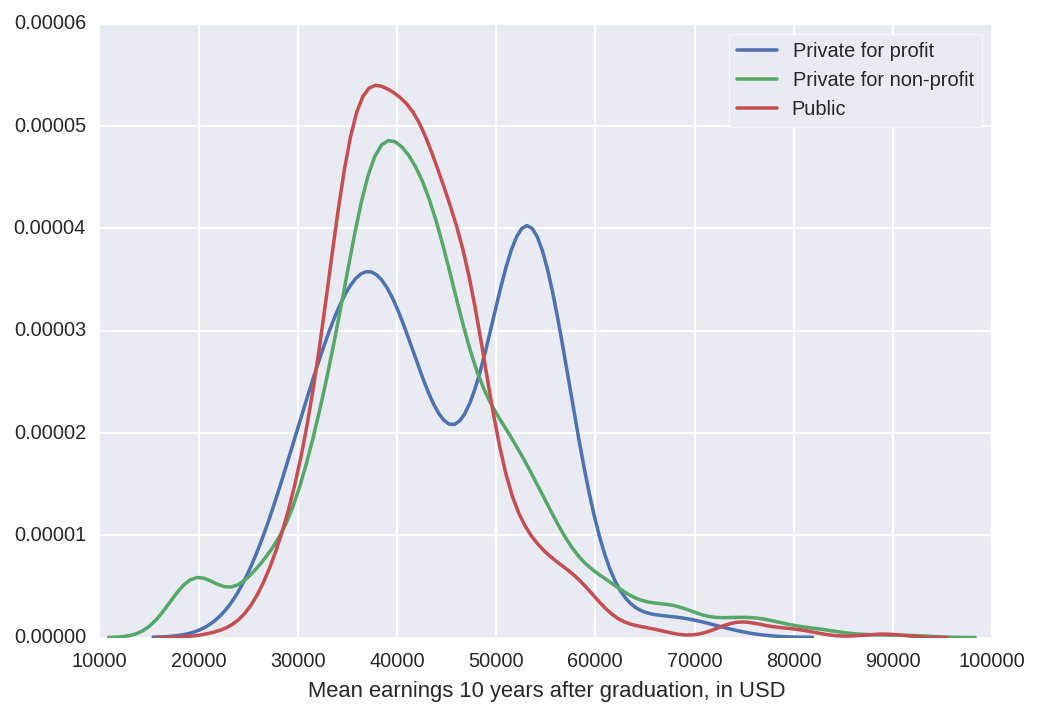

In [42]:
sns.set()
fig = sns.kdeplot(PforProfit['Private for profit'], legend = True)
fig = sns.kdeplot(PforNonProfit['Private for non-profit'], legend = True)
fig = sns.kdeplot(Public['Public'], legend = True)
plt.xlabel('Mean earnings 10 years after graduation, in USD')
plt.legend(frameon = True)
plt.savefig("EarningKDE.png", bbox_inches = 'tight')

In [44]:
earningTop20 = earnings.sort(columns='e90', ascending=False).head(20).reset_index()
del earningTop20['index']

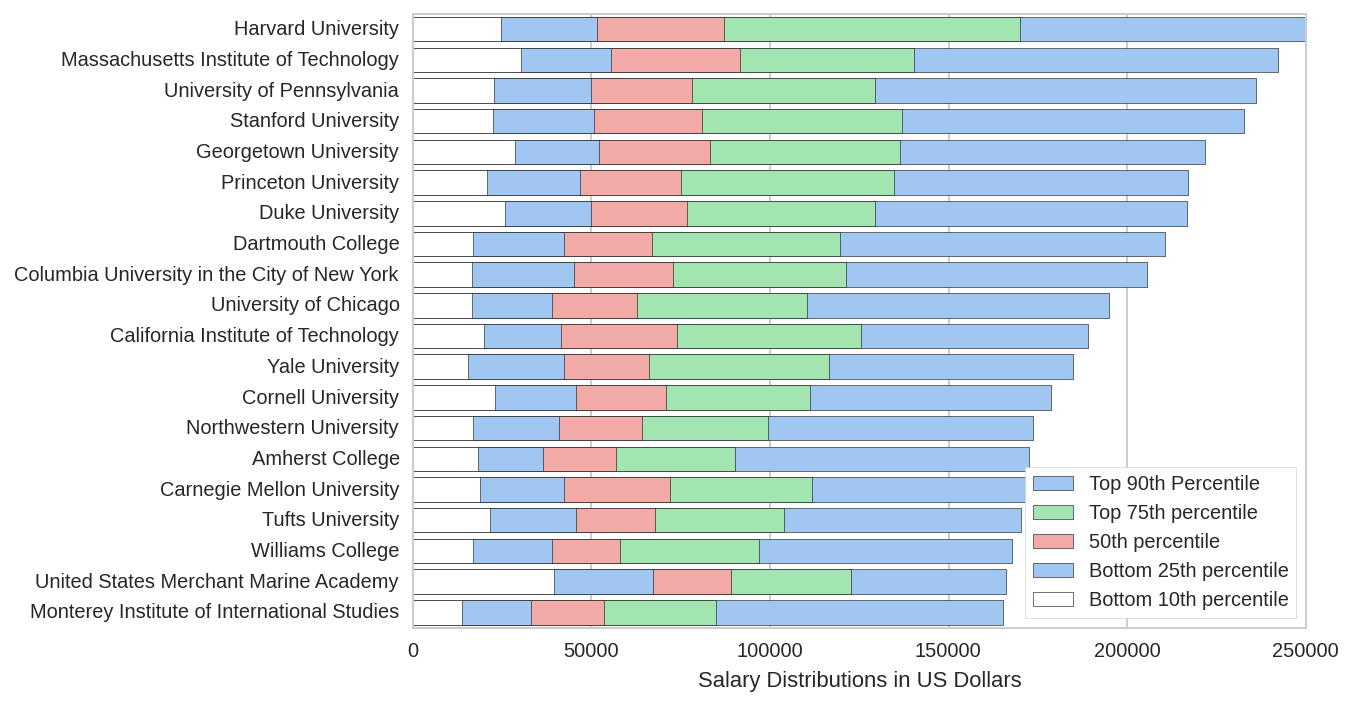

In [45]:
sns.set(style="whitegrid")

sns.set_color_codes("pastel")

sns.barplot(x="e90", y="College", data=earningTop20, label="Top 90th Percentile", color="b")
sns.barplot(x="e75", y="College", data=earningTop20, label="Top 75th percentile", color="g")
sns.barplot(x="e50", y="College", data=earningTop20, label="50th percentile", color="r")
sns.barplot(x="e25", y="College", data=earningTop20, label="Bottom 25th percentile", color="b")
sns.barplot(x="e10", y="College", data=earningTop20, label="Bottom 10th percentile", color="w")

plt.xlabel('Salary Distributions in US Dollars')
plt.ylabel('')
plt.legend(loc = "lower right", frameon = True)
plt.savefig("IncomeDistribution90th.png", bbox_inches='tight')

sns.set()

##SAT Performance...

In [46]:
SATPerformance = cPickle.load(open('SATPerformance.pkl', 'rb'))

In [47]:
SATMath = SATPerformance[['College', 'Math']]
SATVerbal = SATPerformance[['College', 'Verbal']]
SATWriting = SATPerformance[['College', 'Writing']]

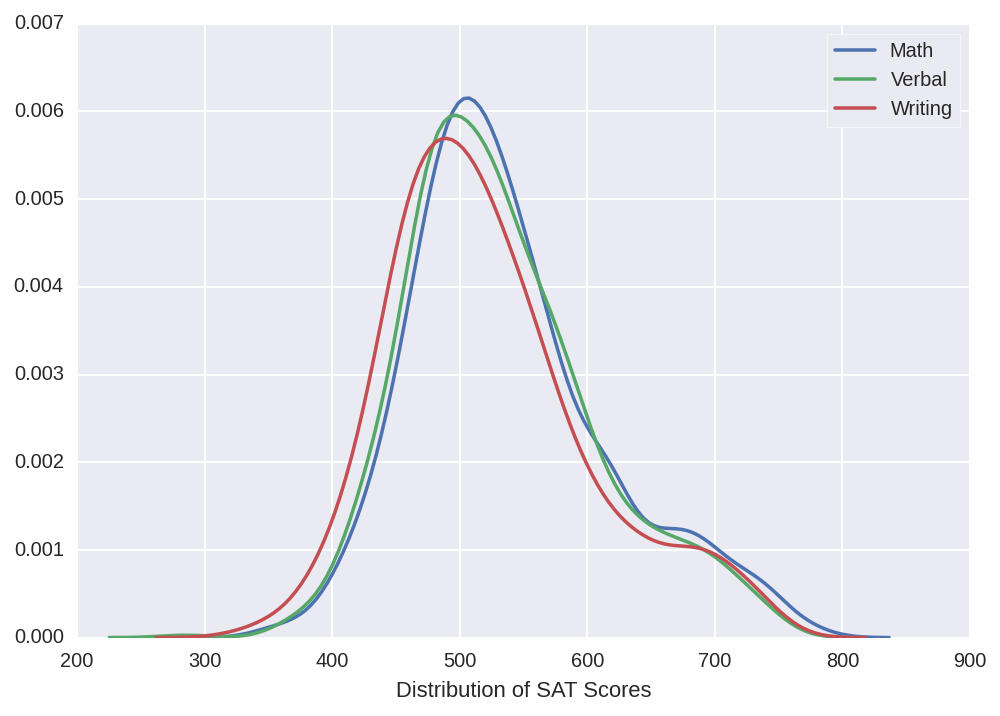

In [48]:
fig = sns.kdeplot(SATMath['Math'], legend = True)
fig = sns.kdeplot(SATVerbal['Verbal'], legend = True)
fig = sns.kdeplot(SATWriting['Writing'], legend = True)
plt.xlabel('Distribution of SAT Scores')
plt.legend(frameon = True)
plt.savefig("SATkde.png",bbox_inches='tight')

In [ ]:
SATVerbalTop20 = SATPerformance.sort(columns='Verbal', ascending=False).head(20).reset_index()
del SATVerbalTop20['index']

In [ ]:
myDF = SATVerbalTop20.sort(columns='Verbal', ascending = True).reset_index()
myDF['Verbal'].plot(kind = 'barh', legend = False)
univs = myDF.College
plt.yticks(myDF.index, univs)
plt.xlabel('SAT Verbal Score')
plt.title('Top 20 SAT Verbal Score Acceptances')
plt.savefig("TopSATVerbal.png", bbox_inches='tight')

In [ ]:
SATMathTop20 = SATPerformance.sort(columns='Math', ascending=False).head(20).reset_index()
del SATMathTop20['index']

In [ ]:
myDF = SATVerbalTop20.sort(columns='Math', ascending = True).reset_index()
myDF['Math'].plot(kind = 'barh', legend = False)
univs = myDF.College
plt.yticks(myDF.index, univs)
plt.xlabel('SAT Math Score')
plt.title('Top 20 SAT Math Score Acceptances')
plt.savefig("TopSATMath.png", bbox_inches='tight')

In [ ]:
SATWritingTop20 = SATPerformance.sort(columns='Writing', ascending=False).head(20).reset_index()
del SATWritingTop20['index']

In [ ]:
myDF = SATWritingTop20.sort(columns='Math', ascending = True).reset_index()
myDF['Math'].plot(kind = 'barh', legend = False)
univs = myDF.College
plt.yticks(myDF.index, univs)
plt.xlabel('SAT Writing Score')
plt.title('Top 20 SAT Writing Score Acceptances')
plt.savefig("TopSATWriting.png", bbox_inches='tight')

## Pell grant to median income correlation...

In [49]:
PellMatrix = cPickle.load(open('PellMatrix.pkl', 'rb'))

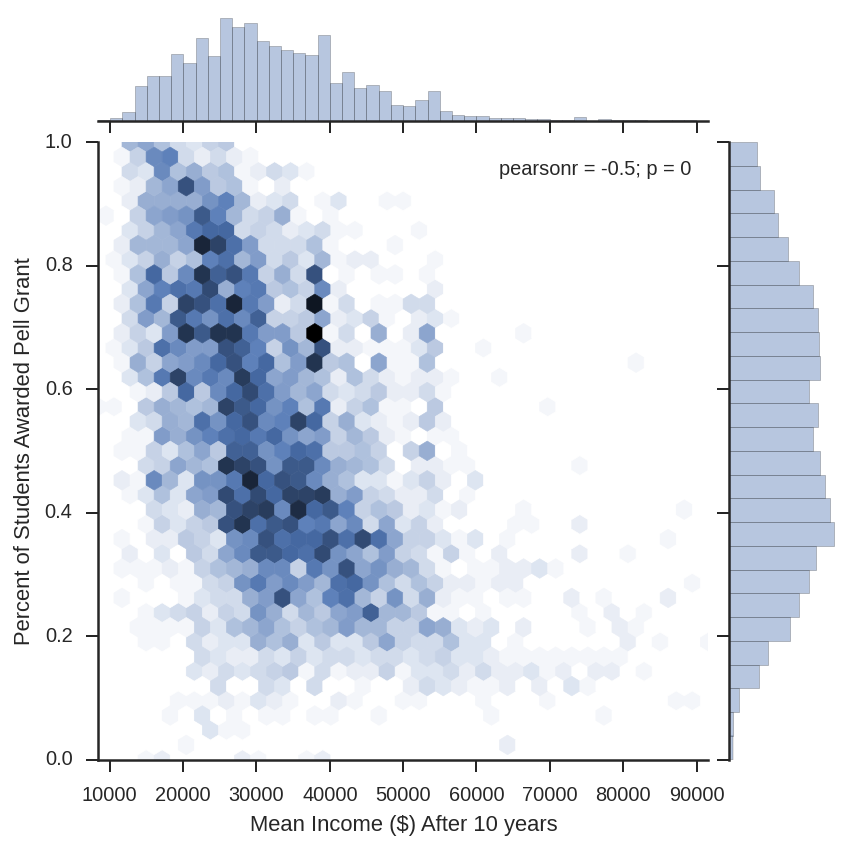

In [50]:
PellMatrix1 = PellMatrix[PellMatrix['e50'] <= 100000]
PellMatrix1.rename(columns={'e50': 'Mean Income ($) After 10 years', 
                            'PercentPell': 'Percent of Students Awarded Pell Grant' }, inplace=True)

sns.set(style="ticks", context="notebook", font='sans-serif')
pal = sns.cubehelix_palette(4, 1.5, .75, light = 0.8, dark = 0.1)
p = sns.jointplot("Mean Income ($) After 10 years", "Percent of Students Awarded Pell Grant", data = PellMatrix1, kind = "hex")
#rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
#p.annotate(rsquare, template="{stat}: {val:.2f}",               
           #stat="$R^2$", loc="center right", fontsize=12)
plt.savefig("PellMeanPairPlot.png")

### Plot from the 2011 data...

In [ ]:
modelData2011 = cPickle.load(open('modelData2011.pkl', 'rb'))
modelData = modelData2011.dropna(axis=0, how='any')

####Examine the Expenditure per FTE category

In [ ]:
list(modelData.columns)

In [ ]:
X = modelData[modelData['ExpenditureFTE'] < 50000]['ExpenditureFTE']
y = modelData[modelData['ExpenditureFTE'] < 50000]['E50']

In [ ]:
p = sns.regplot(x = X, y = y, data = modelData, ci=None)
plt.xlim([0, 50000])

In [ ]:
features = [
 'CollegeType',
 'TuitionFTE',
 'ExpenditureFTE',
 'AvgFacultySal',
 'Math',
 'PercentPell',
 'E50']
X = modelData[features]

In [ ]:
p = sns.pairplot(X, hue = 'CollegeType')